## CNN Model for CIFAR10 Dataset : A comparative Discussion on different Optimizers and Regularizers

In this project we will try to build a CNN model that will focus on obtaining maximum accuracy and minimum loss. We will be using the "CIFAR-10" dataset and try to do the below tasks -<br>
    ``` 1. Use sequential neural network architecture```<br>
    ``` 2. Use 3 different optimizers - 'adam', 'sgd' and 'rmsprop'```<br>
    ``` 3. Use different parameters of the optimezers too```<br>
    ``` 4. Use regularizers (L1/L2) to analyse its effects on Convolutional layers```<br>
    ``` 5. Use comparative plots and graphs for discussion```<br>

#### Import necessary libraries and Download CIFAR-10 dataset

In [1]:
# Import librtaries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
# Download CIFAR-10 dataset
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from keras import regularizers

In [3]:
# Load the dataset
(train_img, train_label), (test_img, test_label) = cifar10.load_data()

In [4]:
# List the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


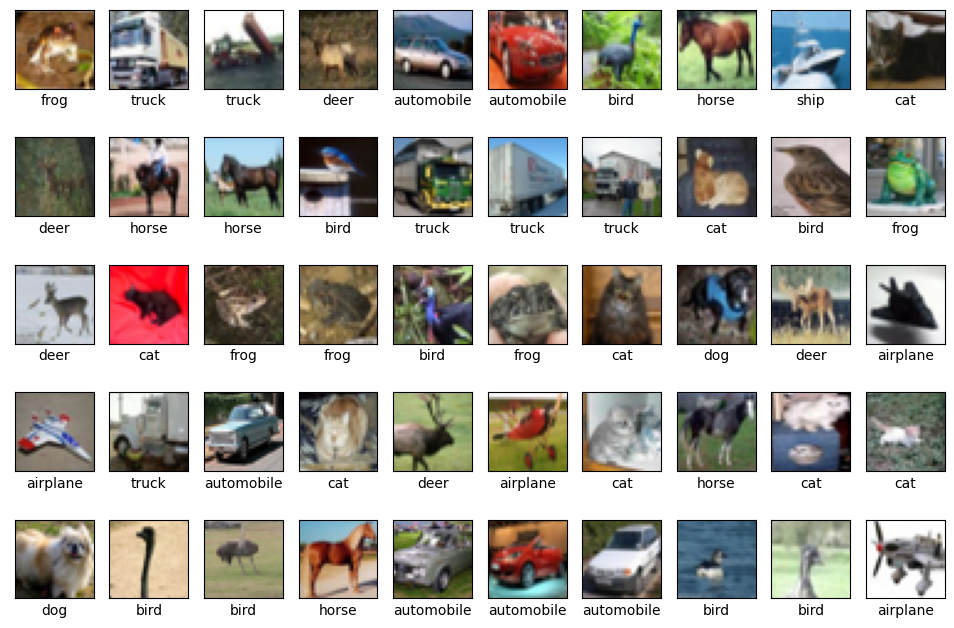

In [5]:
# Load the data from the file and show using plot
plt.figure(figsize=(12, 8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(train_img[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[train_label[i][0]])
plt.show()

## MODEL BUILDING

For the convenience of our project, we built the models in a different file and fetched them here to train, compile and evaluate. We have built 3 different models with different techniques, architectures and parameters. We used different optimizers too and gradually updatef them to fit into our requirements with the best suited strategies.<br><br>
We have used the Sequential model architecture and used different compilation techniques with different optimizers and fit each model separately. Below, we have shown the code snippet of each models for your convinience-

Here, we will try to improve the model architecture based on different Regularization -<br>
<pre>
    <b>1. Adding Dropout:</b> Reduce overfitting by reducing the memory of the model
    <b>2. Adding Batch Normalization:</b> It normalizes the activations of each layer in a 
    mini-batch.
    <b>3. Adding Kernal Regularization:</b> L1 regularization adds a penalty to the 
    absolute values of the weights. While, L2 regularization adds a penalty to the 
    squared values of the weights. It prevents overfitting the model.
</pre>
Beside this we will use Flatten layers to reshape the data; using kernel initializer will help the model to converge faster.

##### NEURAL NETWORK SEQUENTIAL MODEL 1

```
model1 = keras.Sequential([
    ## input layer
    keras.Input(shape=(32, 32, 3)),
    
    ## hidden layers
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), 
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),  
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),  # (14, 14)
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), 
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), 
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),  # (5, 5)
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'), 
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    ## output layer
    keras.layers.Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 batch_normalization (BatchN  (None, 32, 32, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 12, 12, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 batch_normalization_4 (Batc  (None, 10, 10, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 5, 5, 64)         256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 batch_normalization_6 (Batc  (None, 3, 3, 128)        512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 1, 1, 128)        512       
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 batch_normalization_8 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
=================================================================
Total params: 176,822
Trainable params: 175,280
Non-trainable params: 1,542
_________________________________________________________________
```

##### NEURAL NETWORK SEQUENTIAL MODEL 2

```
model2 = keras.Sequential([
    ## input layer
    keras.Input(shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    
    ## hidden layers
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='SAME', 
                        kernel_initializer='he_uniform', 
                       ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),  
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='SAME', 
                        kernel_initializer='he_uniform',
                       ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu', padding='SAME', 
                        kernel_initializer='he_uniform',
                       ),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(164, activation='relu', kernel_initializer='he_uniform',
                       kernel_regularizer=regularizers.l2(0.01)
                      ),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    
    ## output layer
    keras.layers.Dense(10, activation='softmax'),
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 batch_normalization_10 (Bat  (None, 32, 32, 3)        12        
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_12 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 96)        55392     
                                                                 
 batch_normalization_13 (Bat  (None, 16, 16, 96)       384       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 96)        0         
                                                                 
 flatten_1 (Flatten)         (None, 24576)             0         
                                                                 
 dense_3 (Dense)             (None, 164)               4030628   
                                                                 
 batch_normalization_14 (Bat  (None, 164)              656       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 164)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1650      
                                                                 
=================================================================
Total params: 4,108,498
Trainable params: 4,107,780
Non-trainable params: 718
_________________________________________________________________
```

##### NEURAL NETWORK SEQUENTIAL MODEL 3

```
model3 = keras.Sequential([
    keras.layers.Conv2D(96, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(196, activation='relu', kernel_initializer='he_uniform',
                       kernel_regularizer=regularizers.l2(0.01)
                      ),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_8 (Conv2D)           (None, 30, 30, 96)        2688      
                                                                 
 batch_normalization_15 (Bat  (None, 30, 30, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 96)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 15, 15, 96)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 128)       110720    
                                                                 
 batch_normalization_16 (Bat  (None, 13, 13, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 6, 6, 128)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 256)         295168    
                                                                 
 batch_normalization_17 (Bat  (None, 4, 4, 256)        1024      
 chNormalization)                                                
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 196)               803012    
                                                                 
 batch_normalization_18 (Bat  (None, 196)              784       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 196)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                1970      
                                                                 
=================================================================
Total params: 1,216,262
Trainable params: 1,214,910
Non-trainable params: 1,352
_________________________________________________________________
```

#### L1 and L2 Regularization
At first, we had used both L1 and L2 regularization in Model-2 and Model-3. But it didn't gave the best results. Use of Dropout and Batch Regularization was enough in our case. Using L1 and L2 prevent from overfitting, but using this highly may cause underfitting. In our case, the loss function was fluctuating very much and causing underfitting. That is why we used only used L2 regularization in Model-2 and Model-3 to reduce overfitting and succeeded.

## Using Optimizers and Tuning the Hyperparameters

### Stochastic Gradient Descent (SGD)
SGD is another version of Gradient Descent with bit efficient in choosing loss fuinction. It updates the model's parameters in the direction of the negative gradient of the loss function with respect to the parameters. In other words, it moves the parameters towards the minimum of the loss function, iteratively adjusting them after each batch of data. Therefore, it takes more time to converge to the global minima than the GD.<br>
<b>Hyper-parameters:</b>
<pre>
        <b>Learning Rate-</b> controls the step size during parameter updates
        <b>Momentum- </b>accelerating the convergence process by adding a fraction of the 
        previous update to the current update
        <b>Decay- </b> to reduce the learning rate over time during training to fine-tune 
        the learning rate and improve convergence     
</pre>
We'll use 10 epochs for the model. Every model will have a 0.01 learning rate. The momentum of this will be 0.9, which is a standard value for academic papers. The decay rate we'll be utilizing is as low as 1e-6, which is a very small percentage of the learning rate we'll be using.

In [6]:
# Tuning Hyper-parameters for SGD
epoch = 10
sgd_lr = 0.001
sgd_dcy = sgd_lr/epoch
optimizer_sgd = keras.optimizers.SGD(learning_rate=sgd_lr, momentum=0.9, nesterov=True, decay=1e-6)

In [7]:
# Load the models
model1 = keras.models.load_model("Models/model1.h5")
model2 = keras.models.load_model("Models/model2.h5")
model3 = keras.models.load_model("Models/model3.h5")

In [8]:
model1.compile(
    optimizer= optimizer_sgd, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
h1_sgd = model1.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 28s 12ms/step - loss: 2.3472 - accuracy: 0.2487 - val_loss: 1.9300 - val_accuracy: 0.2526
Epoch 2/10
293/293 [==============================] - 3s 10ms/step - loss: 1.8251 - accuracy: 0.3575 - val_loss: 1.5550 - val_accuracy: 0.4349
Epoch 3/10
293/293 [==============================] - 3s 10ms/step - loss: 1.6252 - accuracy: 0.4147 - val_loss: 1.4697 - val_accuracy: 0.4570
Epoch 4/10
293/293 [==============================] - 3s 10ms/step - loss: 1.5035 - accuracy: 0.4546 - val_loss: 1.4095 - val_accuracy: 0.4854
Epoch 5/10
293/293 [==============================] - 3s 10ms/step - loss: 1.4209 - accuracy: 0.4863 - val_loss: 1.3454 - val_accuracy: 0.5070
Epoch 6/10
293/293 [==============================] - 3s 10ms/step - loss: 1.3587 - accuracy: 0.5117 - val_loss: 1.3229 - val_accuracy: 0.5164
Epoch 7/10
293/293 [==============================] - 3s 10ms/step - loss: 1.3078 - accuracy: 0.5314 - val_loss: 1.2608 - val_accuracy: 0.542

In [10]:
model2.compile(
    optimizer= optimizer_sgd, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
h2_sgd = model2.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 4s 11ms/step - loss: 5.1883 - accuracy: 0.3667 - val_loss: 4.3436 - val_accuracy: 0.5166
Epoch 2/10
293/293 [==============================] - 3s 9ms/step - loss: 4.3011 - accuracy: 0.4939 - val_loss: 3.9027 - val_accuracy: 0.5558
Epoch 3/10
293/293 [==============================] - 3s 9ms/step - loss: 3.8104 - accuracy: 0.5474 - val_loss: 3.5457 - val_accuracy: 0.5850
Epoch 4/10
293/293 [==============================] - 3s 9ms/step - loss: 3.4156 - accuracy: 0.5918 - val_loss: 3.2216 - val_accuracy: 0.6143
Epoch 5/10
293/293 [==============================] - 3s 9ms/step - loss: 3.0889 - accuracy: 0.6243 - val_loss: 2.9426 - val_accuracy: 0.6359
Epoch 6/10
293/293 [==============================] - 3s 9ms/step - loss: 2.8164 - accuracy: 0.6452 - val_loss: 2.7234 - val_accuracy: 0.6450
Epoch 7/10
293/293 [==============================] - 3s 9ms/step - loss: 2.5728 - accuracy: 0.6650 - val_loss: 2.5547 - val_accuracy: 0.6442
Epoch

In [12]:
model3.compile(
    optimizer= optimizer_sgd, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [13]:
h3_sgd = model3.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 4s 11ms/step - loss: 5.8503 - accuracy: 0.3184 - val_loss: 5.1145 - val_accuracy: 0.4146
Epoch 2/10
293/293 [==============================] - 3s 10ms/step - loss: 4.9401 - accuracy: 0.4404 - val_loss: 4.6853 - val_accuracy: 0.4653
Epoch 3/10
293/293 [==============================] - 3s 10ms/step - loss: 4.4066 - accuracy: 0.4881 - val_loss: 4.0956 - val_accuracy: 0.5362
Epoch 4/10
293/293 [==============================] - 3s 11ms/step - loss: 3.9796 - accuracy: 0.5234 - val_loss: 3.7941 - val_accuracy: 0.5348
Epoch 5/10
293/293 [==============================] - 3s 11ms/step - loss: 3.6088 - accuracy: 0.5542 - val_loss: 3.3841 - val_accuracy: 0.5875
Epoch 6/10
293/293 [==============================] - 3s 11ms/step - loss: 3.2909 - accuracy: 0.5734 - val_loss: 3.1098 - val_accuracy: 0.5979
Epoch 7/10
293/293 [==============================] - 3s 11ms/step - loss: 3.0158 - accuracy: 0.5932 - val_loss: 2.8479 - val_accuracy: 0.6214

#### SGD Performance on Validation

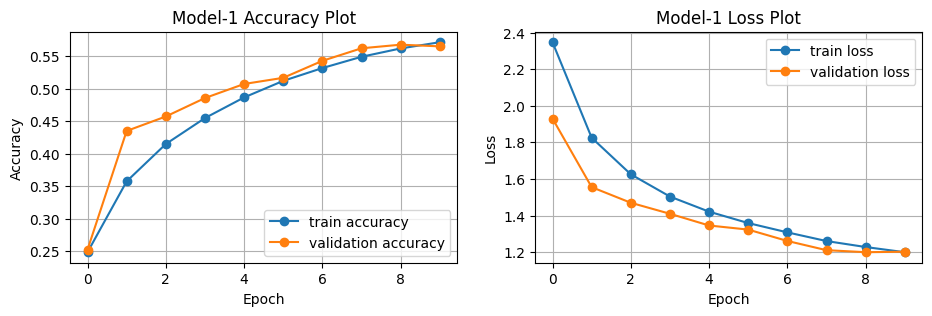

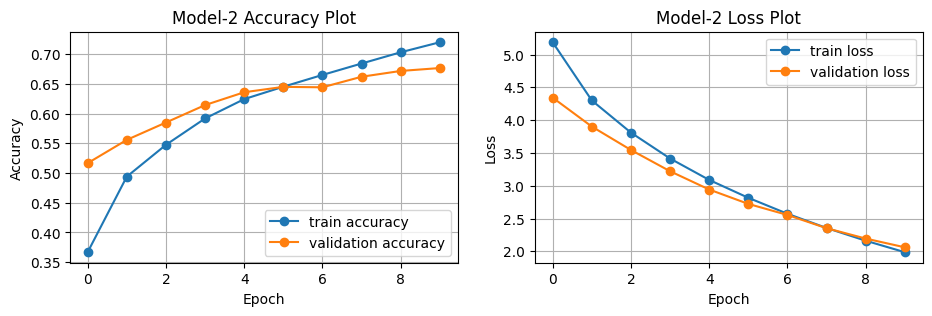

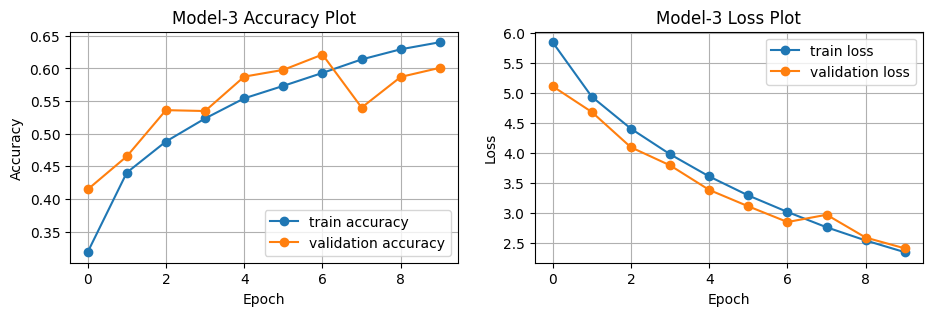

In [14]:
plt.figure(figsize=(35,3))
plt.subplot(1,6,1)
plt.title("Model-1 Accuracy Plot")
plt.plot(h1_sgd.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_sgd.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,2)
plt.title("Model-1 Loss Plot")
plt.plot(h1_sgd.history['loss'], 'o-', label='train loss')
plt.plot(h1_sgd.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(35,3))
plt.subplot(1,6,3)
plt.title("Model-2 Accuracy Plot")
plt.plot(h2_sgd.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2_sgd.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,4)
plt.title("Model-2 Loss Plot")
plt.plot(h2_sgd.history['loss'], 'o-', label='train loss')
plt.plot(h2_sgd.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(35,3))
plt.subplot(1,6,5)
plt.title("Model-3 Accuracy Plot")
plt.plot(h3_sgd.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3_sgd.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,6)
plt.title("Model-3 Loss Plot")
plt.plot(h3_sgd.history['loss'], 'o-', label='train loss')
plt.plot(h3_sgd.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

## Testing on Unseen Data (SGD Optimizer)

In [47]:
test_loss_sgd1, test_acc_sgd1 = model1.evaluate(test_img, test_label)
print("\nMODEL-1 TEST ACCURACY WITH SGD")
print('\nTest Accuracy:', test_acc_sgd1)
print('Test Loss:', test_loss_sgd1)

313/313 [==============================] - 1s 4ms/step - loss: 1.3766 - accuracy: 0.5032

MODEL-1 TEST ACCURACY WITH SGD

Test Accuracy: 0.5031999945640564
Test Loss: 1.376631498336792


In [49]:
test_loss_sgd2, test_acc_sgd2 = model2.evaluate(test_img, test_label)
print("\nMODEL-2 TEST ACCURACY WITH SGD")
print('\nTest Accuracy:', test_acc_sgd2)
print('Test Loss:', test_loss_sgd2)

313/313 [==============================] - 1s 3ms/step - loss: 1.4883 - accuracy: 0.6815

MODEL-2 TEST ACCURACY WITH SGD

Test Accuracy: 0.6815000176429749
Test Loss: 1.488272786140442


In [50]:
test_loss_sgd3, test_acc_sgd3 = model3.evaluate(test_img, test_label)
print("\nMODEL-3 TEST ACCURACY WITH SGD")
print('\nTest Accuracy:', test_acc_sgd3)
print('Test Loss:', test_loss_sgd3)

313/313 [==============================] - 1s 3ms/step - loss: 1.0252 - accuracy: 0.7306

MODEL-3 TEST ACCURACY WITH SGD

Test Accuracy: 0.7305999994277954
Test Loss: 1.0252277851104736


### Root Mean Square Propagation (RMSProp)
RMSprop is an adaptive learning rate optimization algorithm which divides the learning rate by an exponentially decaying average of the squared gradients for each parameter. In other words, it scales the learning rate for each iteration so the algorithm decreases the step for large gradients to avoid exploding and increases the step for small gradients to avoid vanishing. Therefore, a faster route to converging to the global minima.<br>
<b>Hyper-parameters:</b>
<pre>
        <b>Learning Rate-</b> controls the step size during parameter updates.Using
        a fixed rate, we will be using scheduled updation of it.
        <b>Decay Factor(rho)- </b> It is used to control the exponential moving 
        average of squared gradients.  
</pre>
We'll use 10 epochs for the model. Rather than taking a fixed learning rate, we will be updating it by scheduling an updating method for the learning rate for each epoch. We will be using 0.9 as the decay factor.

In [18]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.001,
    decay_steps=10000,
    decay_rate=0.99)
epoch = 10
rmsp_lr = lr_schedule
optimizer_rmsp = keras.optimizers.RMSprop(learning_rate = rmsp_lr)

In [19]:
# Load the models
model1 = keras.models.load_model("Models/model1.h5")
model2 = keras.models.load_model("Models/model2.h5")
model3 = keras.models.load_model("Models/model3.h5")

In [20]:
model1.compile(
    optimizer= optimizer_rmsp, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [21]:
h1_rmsp = model1.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 7s 15ms/step - loss: 1.9464 - accuracy: 0.3369 - val_loss: 1.8948 - val_accuracy: 0.3094
Epoch 2/10
293/293 [==============================] - 4s 13ms/step - loss: 1.3582 - accuracy: 0.5172 - val_loss: 1.1365 - val_accuracy: 0.5918
Epoch 3/10
293/293 [==============================] - 4s 13ms/step - loss: 1.1485 - accuracy: 0.5964 - val_loss: 1.0922 - val_accuracy: 0.6238
Epoch 4/10
293/293 [==============================] - 4s 14ms/step - loss: 1.0210 - accuracy: 0.6457 - val_loss: 0.9214 - val_accuracy: 0.6771
Epoch 5/10
293/293 [==============================] - 4s 13ms/step - loss: 0.9366 - accuracy: 0.6752 - val_loss: 0.9447 - val_accuracy: 0.6746
Epoch 6/10
293/293 [==============================] - 4s 13ms/step - loss: 0.8733 - accuracy: 0.6983 - val_loss: 0.8518 - val_accuracy: 0.7060
Epoch 7/10
293/293 [==============================] - 4s 13ms/step - loss: 0.8165 - accuracy: 0.7199 - val_loss: 0.8054 - val_accuracy: 0.7212

In [22]:
model2.compile(
    optimizer= optimizer_rmsp, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [23]:
h2_rmsp = model2.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 5s 12ms/step - loss: 3.3621 - accuracy: 0.4588 - val_loss: 2.3565 - val_accuracy: 0.5573
Epoch 2/10
293/293 [==============================] - 3s 11ms/step - loss: 2.2236 - accuracy: 0.5824 - val_loss: 1.9466 - val_accuracy: 0.6402
Epoch 3/10
293/293 [==============================] - 3s 11ms/step - loss: 2.0001 - accuracy: 0.6294 - val_loss: 1.8856 - val_accuracy: 0.6529
Epoch 4/10
293/293 [==============================] - 3s 11ms/step - loss: 1.9192 - accuracy: 0.6556 - val_loss: 1.8308 - val_accuracy: 0.6781
Epoch 5/10
293/293 [==============================] - 3s 11ms/step - loss: 1.8877 - accuracy: 0.6756 - val_loss: 1.8071 - val_accuracy: 0.6884
Epoch 6/10
293/293 [==============================] - 3s 11ms/step - loss: 1.8471 - accuracy: 0.6952 - val_loss: 1.8167 - val_accuracy: 0.7064
Epoch 7/10
293/293 [==============================] - 3s 11ms/step - loss: 1.8173 - accuracy: 0.7099 - val_loss: 1.8061 - val_accuracy: 0.7105

In [24]:
model3.compile(
    optimizer= optimizer_rmsp, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [25]:
h3_rmsp = model3.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 5s 12ms/step - loss: 2.9474 - accuracy: 0.4698 - val_loss: 1.7948 - val_accuracy: 0.5167
Epoch 2/10
293/293 [==============================] - 3s 11ms/step - loss: 1.5570 - accuracy: 0.6036 - val_loss: 2.7021 - val_accuracy: 0.4229
Epoch 3/10
293/293 [==============================] - 3s 11ms/step - loss: 1.3699 - accuracy: 0.6676 - val_loss: 1.6358 - val_accuracy: 0.5653
Epoch 4/10
293/293 [==============================] - 3s 11ms/step - loss: 1.2570 - accuracy: 0.7028 - val_loss: 1.6939 - val_accuracy: 0.5937
Epoch 5/10
293/293 [==============================] - 3s 11ms/step - loss: 1.1747 - accuracy: 0.7316 - val_loss: 2.0995 - val_accuracy: 0.5555
Epoch 6/10
293/293 [==============================] - 3s 11ms/step - loss: 1.1188 - accuracy: 0.7477 - val_loss: 1.3115 - val_accuracy: 0.6869
Epoch 7/10
293/293 [==============================] - 3s 11ms/step - loss: 1.0759 - accuracy: 0.7631 - val_loss: 1.2351 - val_accuracy: 0.7122

#### RMSProp Performance on Validation

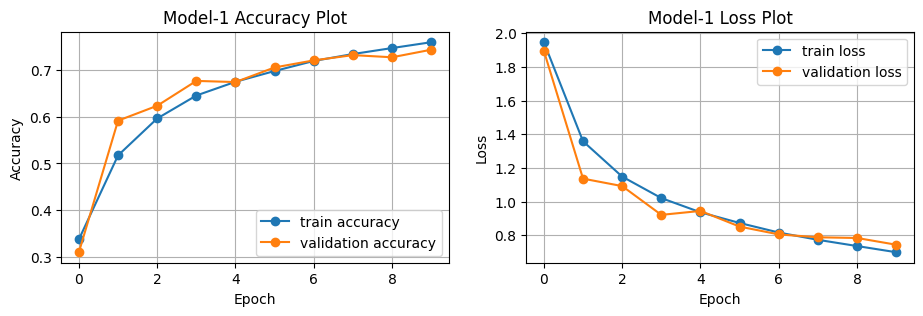

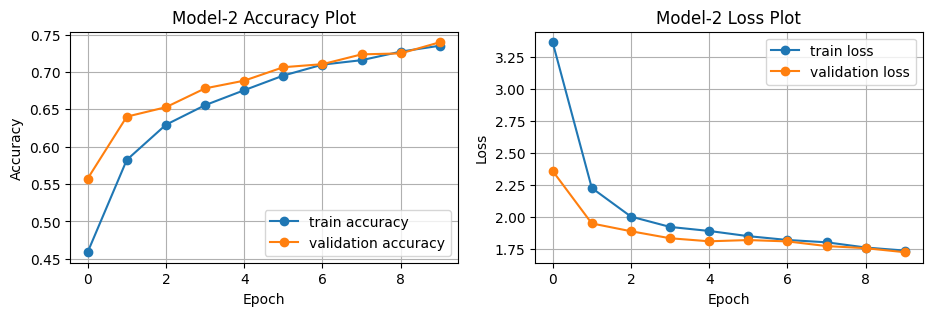

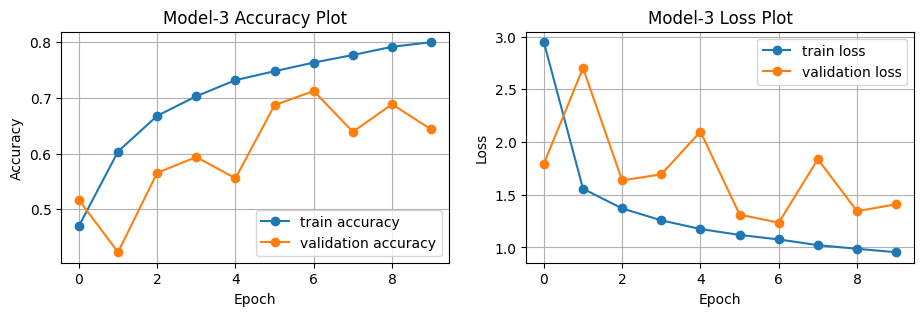

In [26]:
plt.figure(figsize=(35,3))
plt.subplot(1,6,1)
plt.title("Model-1 Accuracy Plot")
plt.plot(h1_rmsp.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_rmsp.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,2)
plt.title("Model-1 Loss Plot")
plt.plot(h1_rmsp.history['loss'], 'o-', label='train loss')
plt.plot(h1_rmsp.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(35,3))
plt.subplot(1,6,3)
plt.title("Model-2 Accuracy Plot")
plt.plot(h2_rmsp.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2_rmsp.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,4)
plt.title("Model-2 Loss Plot")
plt.plot(h2_rmsp.history['loss'], 'o-', label='train loss')
plt.plot(h2_rmsp.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(35,3))
plt.subplot(1,6,5)
plt.title("Model-3 Accuracy Plot")
plt.plot(h3_rmsp.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3_rmsp.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,6)
plt.title("Model-3 Loss Plot")
plt.plot(h3_rmsp.history['loss'], 'o-', label='train loss')
plt.plot(h3_rmsp.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

##### Updation of Learning Rate in RMSprop
The initial learning rate for the RMSprop optimizer was finally chosen as 0.0001. Which is a very small step size for the model to learn in the very begining. But we used a scheduled learning rate to vary it through the iterations.<br><br>
Using a bit bigger learning rate like 0.001 did performed well in accuracy for both training and validation in all three models. But it increased the fluctuation of validation loss, resulting in overfitting.<br><br>
Using a smaller learning rate like 0.00001 was not as good as the other one but the loss of both training and validation was much higher (4-5x on avg.) than that. The gap between loss and accuracy was parallally compelling but not seem to be a good fit for unseen data. Although, it shows less chance of overfitting, but it also show less chance of correctly predicting unseen data.<br><br>
After many error and trials, it has come to that the decay with 10,000 steps and initial learning rate with 0.0001 seems to be a good fit for all the three models as all of them shows better accuracy with a very decent loss for both training and validation


## Testing on Unseen Data (RMSprop Optimizer)

In [51]:
test_loss_rmsp1, test_acc_rmsp1 = model1.evaluate(test_img, test_label)
print("MODEL-2 TEST ACCURACY WITH RMSprop")
print('\nTest Accuracy:', test_acc_rmsp1)
print('Test Loss:', test_loss_rmsp1)

313/313 [==============================] - 1s 4ms/step - loss: 1.3766 - accuracy: 0.5032
MODEL-2 TEST ACCURACY WITH RMSprop

Test Accuracy: 0.5031999945640564
Test Loss: 1.376631498336792


In [52]:
test_loss_rmsp2, test_acc_rmsp2 = model2.evaluate(test_img, test_label)
print("MODEL-2 TEST ACCURACY WITH RMSprop")
print('\nTest Accuracy:', test_acc_rmsp2)
print('Test Loss:', test_loss_rmsp2)

313/313 [==============================] - 1s 3ms/step - loss: 1.4883 - accuracy: 0.6815
MODEL-2 TEST ACCURACY WITH RMSprop

Test Accuracy: 0.6815000176429749
Test Loss: 1.488272786140442


In [53]:
test_loss_rmsp3, test_acc_rmsp3 = model3.evaluate(test_img, test_label)
print("MODEL-2 TEST ACCURACY WITH RMSprop")
print('\nTest Accuracy:', test_acc_rmsp3)
print('Test Loss:', test_loss_rmsp3)

313/313 [==============================] - 1s 3ms/step - loss: 1.0252 - accuracy: 0.7306
MODEL-2 TEST ACCURACY WITH RMSprop

Test Accuracy: 0.7305999994277954
Test Loss: 1.0252277851104736


### Adaptive Moment Estimation (ADAM)
Adam is an adaptive learning rate optimization algorithm that combines the ideas of both AdaGrad and RMSprop. It maintains separate learning rates for each parameter and adapts them based on the historical gradient information. It uses exponentially decaying average of past squared gradients and past gradients to calculate the adaptive learning rate. In other words, Adam takes both the idea of momentum and learning rate decaying and merge them into one to converge faster to the global minima.<br>
<b>Hyper-parameters:</b>
<pre>
        <b>Learning Rate-</b> It controls the step size during parameter updates. 
        Using a fixed rate, we will be using scheduled updation of it.
        <b>Beta1 (beta_1)-</b> It is the exponential decay rate for the first-moment
        estimates (mean) of the gradients.
        <b>Beta2 (beta_2)-</b> It is the exponential decay rate for the second-moment 
        estimates (uncentered variance) of the gradients.
        <b>Epsilon (epsilon)-</b>A small value added to the denominator to prevent 
        division by zero when calculating the adaptive learning rates. 
</pre>
We'll use 10 epochs for the model. The learning rate we will be using is 0.001, not much bigger or smaller. For Beta1 we will be using 0.9 and for Beta2 it will be 0.99 in the initial phase of the training. Epsilon would be used as 1e-8.

In [30]:
adam_lr = 0.0001
beta1 = 0.99
beta2 = 0.9999
eps = 1e-9

optimizer_adam = keras.optimizers.Adam(learning_rate=adam_lr, beta_1=beta1, beta_2=beta2, epsilon=eps)

In [31]:
# Load the models
model1 = keras.models.load_model("Models/model1.h5")
model2 = keras.models.load_model("Models/model2.h5")
model3 = keras.models.load_model("Models/model3.h5")

In [32]:
model1.compile(
    optimizer= optimizer_adam, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [33]:
h1_adam = model1.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 5s 11ms/step - loss: 2.6913 - accuracy: 0.1956 - val_loss: 2.1995 - val_accuracy: 0.1991
Epoch 2/10
293/293 [==============================] - 3s 10ms/step - loss: 2.2103 - accuracy: 0.2773 - val_loss: 1.7612 - val_accuracy: 0.3532
Epoch 3/10
293/293 [==============================] - 3s 10ms/step - loss: 2.0048 - accuracy: 0.3191 - val_loss: 1.6588 - val_accuracy: 0.3976
Epoch 4/10
293/293 [==============================] - 3s 10ms/step - loss: 1.8612 - accuracy: 0.3558 - val_loss: 1.6007 - val_accuracy: 0.4178
Epoch 5/10
293/293 [==============================] - 3s 10ms/step - loss: 1.7657 - accuracy: 0.3842 - val_loss: 1.5580 - val_accuracy: 0.4382
Epoch 6/10
293/293 [==============================] - 3s 10ms/step - loss: 1.6781 - accuracy: 0.4062 - val_loss: 1.5145 - val_accuracy: 0.4542
Epoch 7/10
293/293 [==============================] - 3s 10ms/step - loss: 1.6197 - accuracy: 0.4239 - val_loss: 1.4838 - val_accuracy: 0.4620

In [34]:
model2.compile(
    optimizer= optimizer_adam, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [35]:
h2_adam = model2.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 4s 10ms/step - loss: 4.9700 - accuracy: 0.3923 - val_loss: 3.7421 - val_accuracy: 0.5228
Epoch 2/10
293/293 [==============================] - 3s 9ms/step - loss: 2.9973 - accuracy: 0.5374 - val_loss: 2.2714 - val_accuracy: 0.5894
Epoch 3/10
293/293 [==============================] - 3s 9ms/step - loss: 2.0075 - accuracy: 0.6057 - val_loss: 1.8475 - val_accuracy: 0.6049
Epoch 4/10
293/293 [==============================] - 3s 9ms/step - loss: 1.6644 - accuracy: 0.6515 - val_loss: 1.6889 - val_accuracy: 0.6366
Epoch 5/10
293/293 [==============================] - 3s 9ms/step - loss: 1.4968 - accuracy: 0.6915 - val_loss: 1.5821 - val_accuracy: 0.6596
Epoch 6/10
293/293 [==============================] - 3s 9ms/step - loss: 1.3954 - accuracy: 0.7122 - val_loss: 1.5592 - val_accuracy: 0.6646
Epoch 7/10
293/293 [==============================] - 3s 9ms/step - loss: 1.3203 - accuracy: 0.7381 - val_loss: 1.5391 - val_accuracy: 0.6706
Epoch

In [36]:
model3.compile(
    optimizer= optimizer_adam, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [37]:
h3_adam = model3.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 4s 11ms/step - loss: 4.9201 - accuracy: 0.3826 - val_loss: 3.3291 - val_accuracy: 0.5001
Epoch 2/10
293/293 [==============================] - 3s 10ms/step - loss: 2.5833 - accuracy: 0.5277 - val_loss: 1.9871 - val_accuracy: 0.5554
Epoch 3/10
293/293 [==============================] - 3s 10ms/step - loss: 1.6899 - accuracy: 0.5984 - val_loss: 1.4668 - val_accuracy: 0.6265
Epoch 4/10
293/293 [==============================] - 3s 10ms/step - loss: 1.3623 - accuracy: 0.6481 - val_loss: 1.3268 - val_accuracy: 0.6451
Epoch 5/10
293/293 [==============================] - 3s 10ms/step - loss: 1.1943 - accuracy: 0.6824 - val_loss: 1.1944 - val_accuracy: 0.6797
Epoch 6/10
293/293 [==============================] - 3s 10ms/step - loss: 1.0866 - accuracy: 0.7114 - val_loss: 1.1222 - val_accuracy: 0.7006
Epoch 7/10
293/293 [==============================] - 3s 10ms/step - loss: 0.9823 - accuracy: 0.7397 - val_loss: 1.1147 - val_accuracy: 0.7011

#### ADAM Performance on Validation

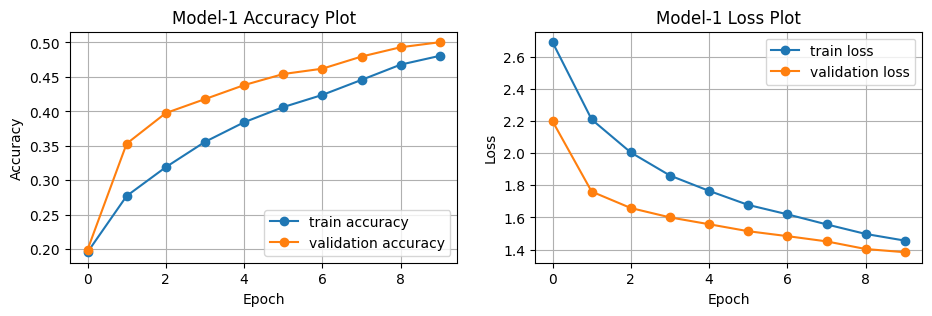

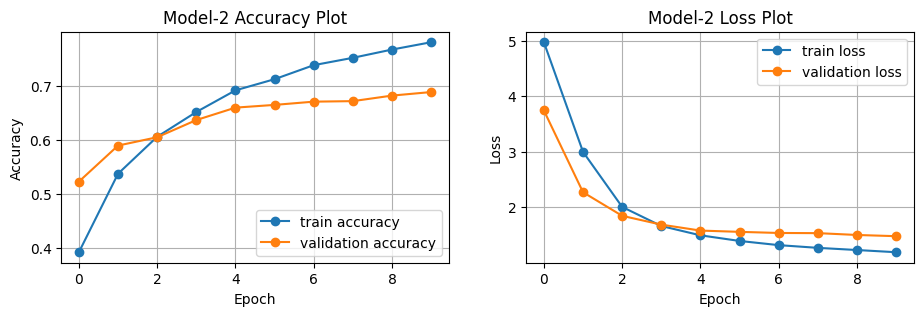

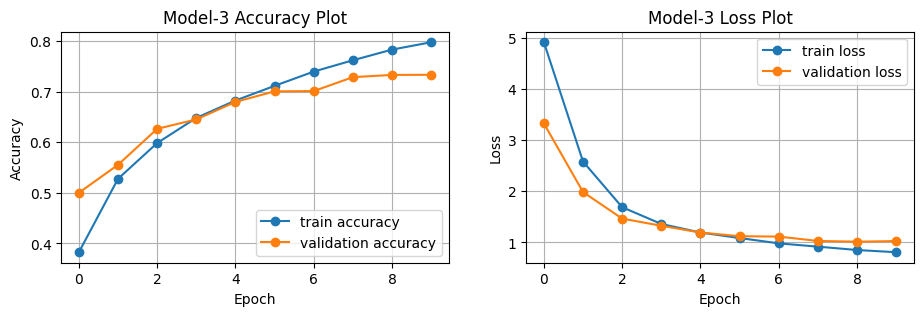

In [38]:
plt.figure(figsize=(35,3))
plt.subplot(1,6,1)
plt.title("Model-1 Accuracy Plot")
plt.plot(h1_adam.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_adam.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,2)
plt.title("Model-1 Loss Plot")
plt.plot(h1_adam.history['loss'], 'o-', label='train loss')
plt.plot(h1_adam.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(35,3))
plt.subplot(1,6,3)
plt.title("Model-2 Accuracy Plot")
plt.plot(h2_adam.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2_adam.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,4)
plt.title("Model-2 Loss Plot")
plt.plot(h2_adam.history['loss'], 'o-', label='train loss')
plt.plot(h2_adam.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(35,3))
plt.subplot(1,6,5)
plt.title("Model-3 Accuracy Plot")
plt.plot(h3_adam.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3_adam.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,6)
plt.title("Model-3 Loss Plot")
plt.plot(h3_adam.history['loss'], 'o-', label='train loss')
plt.plot(h3_adam.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

##### Learning Rate, Beta1, Beta2 and Epsilon updation
After various trial and error, the Adam optimizer gives better accuracy with lesser loss with these value of hyper-parameters tuning:<br>
`adam_lr = 0.0001;   beta1 = 0.99;    beta2 = 0.9999;    eps = 1e-9`

## Testing on Unseen Data (Adam Optimizer)

In [39]:
test_loss_adam1, test_acc_adam1 = model1.evaluate(test_img, test_label)
print("MODEL-3 TEST ACCURACY WITH ADAM")
print('\nTest Accuracy:', test_acc_adam1)
print('Test Loss:', test_loss_adam1)

313/313 [==============================] - 1s 3ms/step - loss: 1.3766 - accuracy: 0.5032
MODEL-1 TEST ACCURACY WITH ADAM

Test Accuracy: 0.5031999945640564
Test Loss: 1.376631498336792


In [54]:
test_loss_adam2, test_acc_adam2 = model2.evaluate(test_img, test_label)
print("MODEL-3 TEST ACCURACY WITH ADAM")
print('\nTest Accuracy:', test_acc_adam2)
print('Test Loss:', test_loss_adam2)

313/313 [==============================] - 1s 3ms/step - loss: 1.4883 - accuracy: 0.6815
MODEL-3 TEST ACCURACY WITH ADAM

Test Accuracy: 0.6815000176429749
Test Loss: 1.488272786140442


In [55]:
test_loss_adam3, test_acc_adam3 = model3.evaluate(test_img, test_label)
print("\nMODEL-3 TEST ACCURACY WITH ADAM")
print('\nTest Accuracy:', test_acc_adam3)
print('Test Loss:', test_loss_adam3)

313/313 [==============================] - 1s 3ms/step - loss: 1.0252 - accuracy: 0.7306: 0s - loss: 1.0272 - accuracy

MODEL-3 TEST ACCURACY WITH ADAM

Test Accuracy: 0.7305999994277954
Test Loss: 1.0252277851104736


## RESULTS

In [112]:
model_names = ['Model-1', 'Model-2', 'Model-3']
model_histories = ['h1', 'h2', 'h3']
optimizers = ['sgd', 'rmsp', 'adam']

max_accuracy_values = {optimizer: [] for optimizer in optimizers}
min_loss_values = {optimizer: [] for optimizer in optimizers}

for model_history in model_histories:
    for optimizer in optimizers:
        variable_name = f"{model_history.lower()}_{optimizer.lower()}"
        history = locals()[variable_name]
        max_accuracy_values[optimizer].append(max(history.history["accuracy"]))
        min_loss_values[optimizer].append(min(history.history["loss"]))

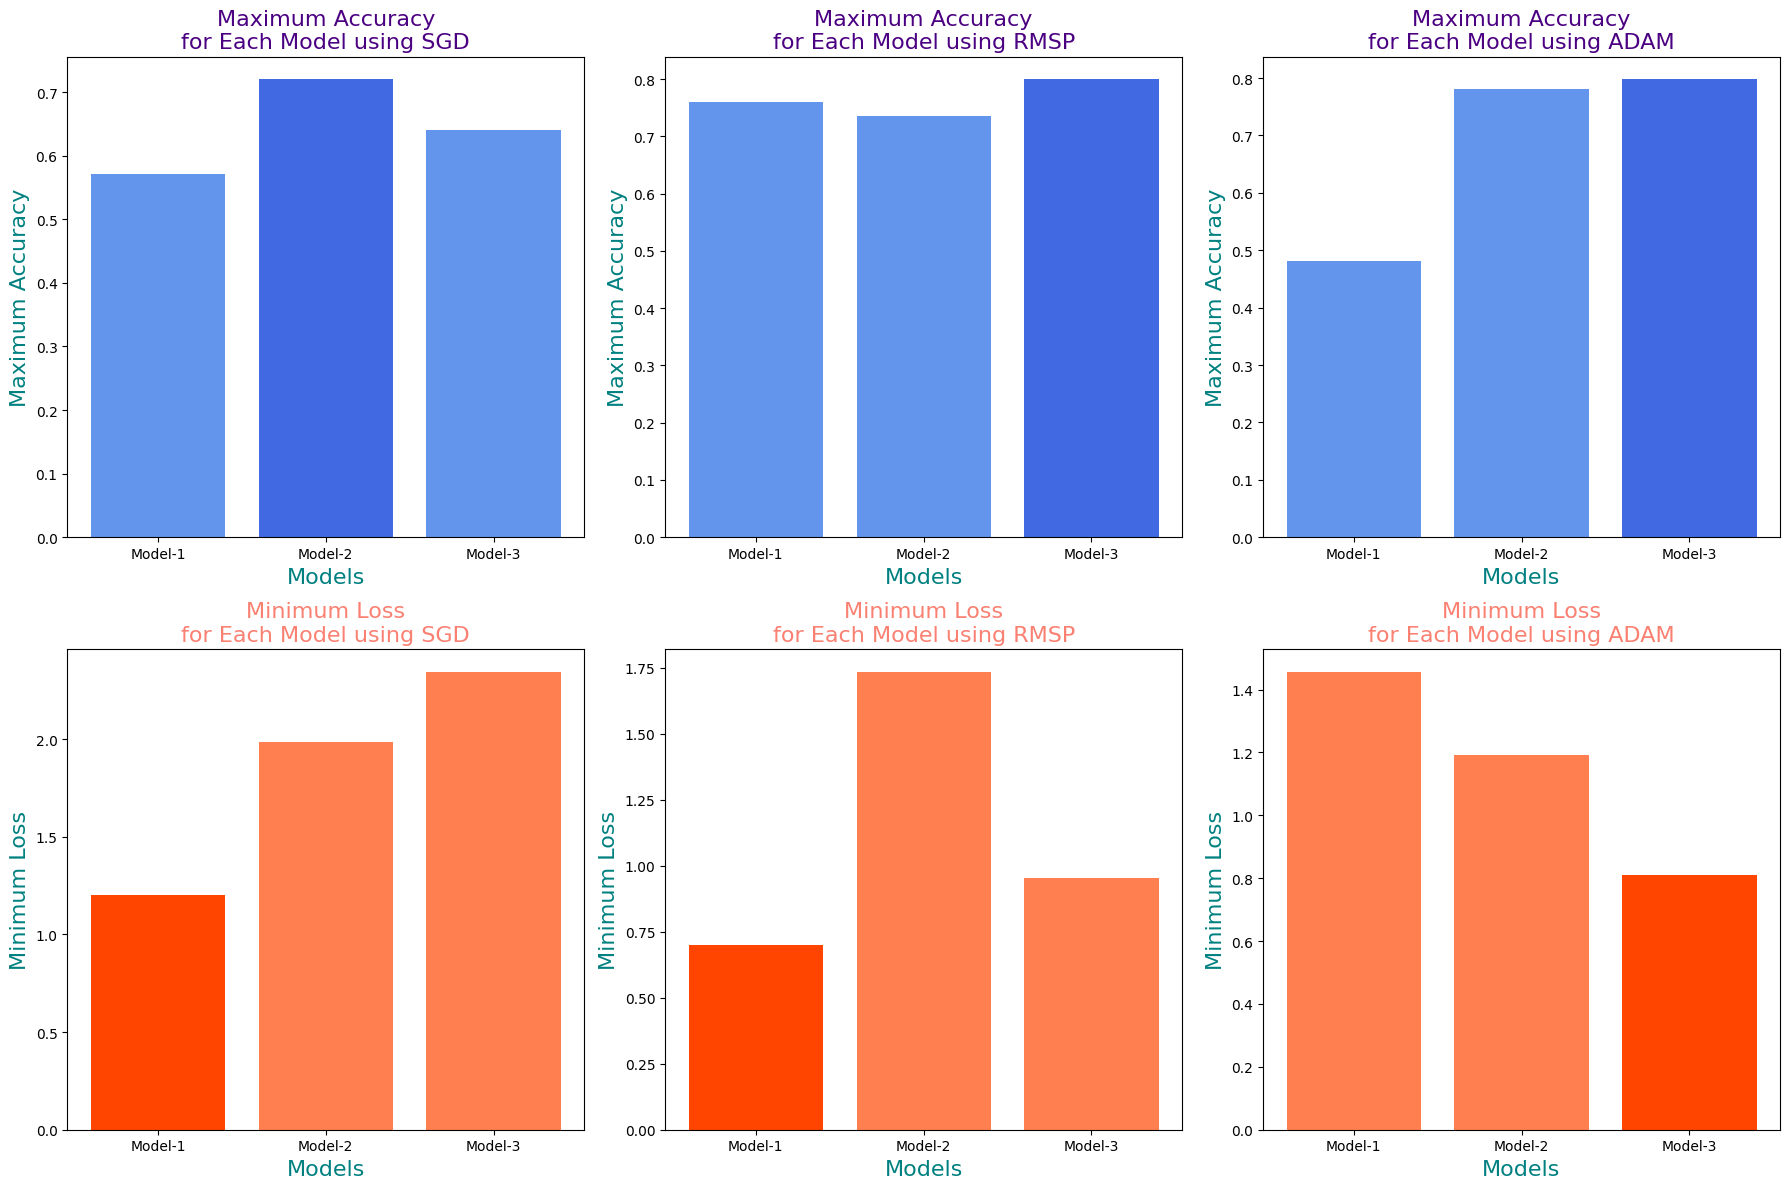

In [149]:
# Calculate max accuracy and min loss indices for each optimizer
max_acc_indices = {optimizer: max_accuracy_values[optimizer].index(max(max_accuracy_values[optimizer])) for optimizer in optimizers}
min_loss_indices = {optimizer: min_loss_values[optimizer].index(min(min_loss_values[optimizer])) for optimizer in optimizers}

# Create a grid of subplots
fig, axs = plt.subplots(2, len(optimizers), figsize=(18, 12))

# Plot maximum accuracy for each optimizer
for i, optimizer in enumerate(optimizers):
    axs[0, i].bar(model_names, max_accuracy_values[optimizer], color='cornflowerblue', label=optimizer)
    axs[0, i].bar(max_acc_indices[optimizer], max_accuracy_values[optimizer][max_acc_indices[optimizer]], color='royalblue')
    axs[0, i].set_xlabel('Models', size=16, color='teal')
    axs[0, i].set_ylabel('Maximum Accuracy', size=16, color='teal')
    axs[0, i].set_title(f'Maximum Accuracy\nfor Each Model using {optimizer.upper()}', size=16, color='indigo')

# Plot minimum loss for each optimizer
for i, optimizer in enumerate(optimizers):
    axs[1, i].bar(model_names, min_loss_values[optimizer], color='coral', label=optimizer)
    axs[1, i].bar(min_loss_indices[optimizer], min_loss_values[optimizer][min_loss_indices[optimizer]], color='orangered')
    axs[1, i].set_xlabel('Models', size=16, color='teal')
    axs[1, i].set_ylabel('Minimum Loss', size=16, color='teal')
    axs[1, i].set_title(f'Minimum Loss\nfor Each Model using {optimizer.upper()}', size=16, color='salmon')

plt.tight_layout()
plt.show()


Model 1
313/313 [==============================] - 1s 4ms/step - loss: 1.3766 - accuracy: 0.5032


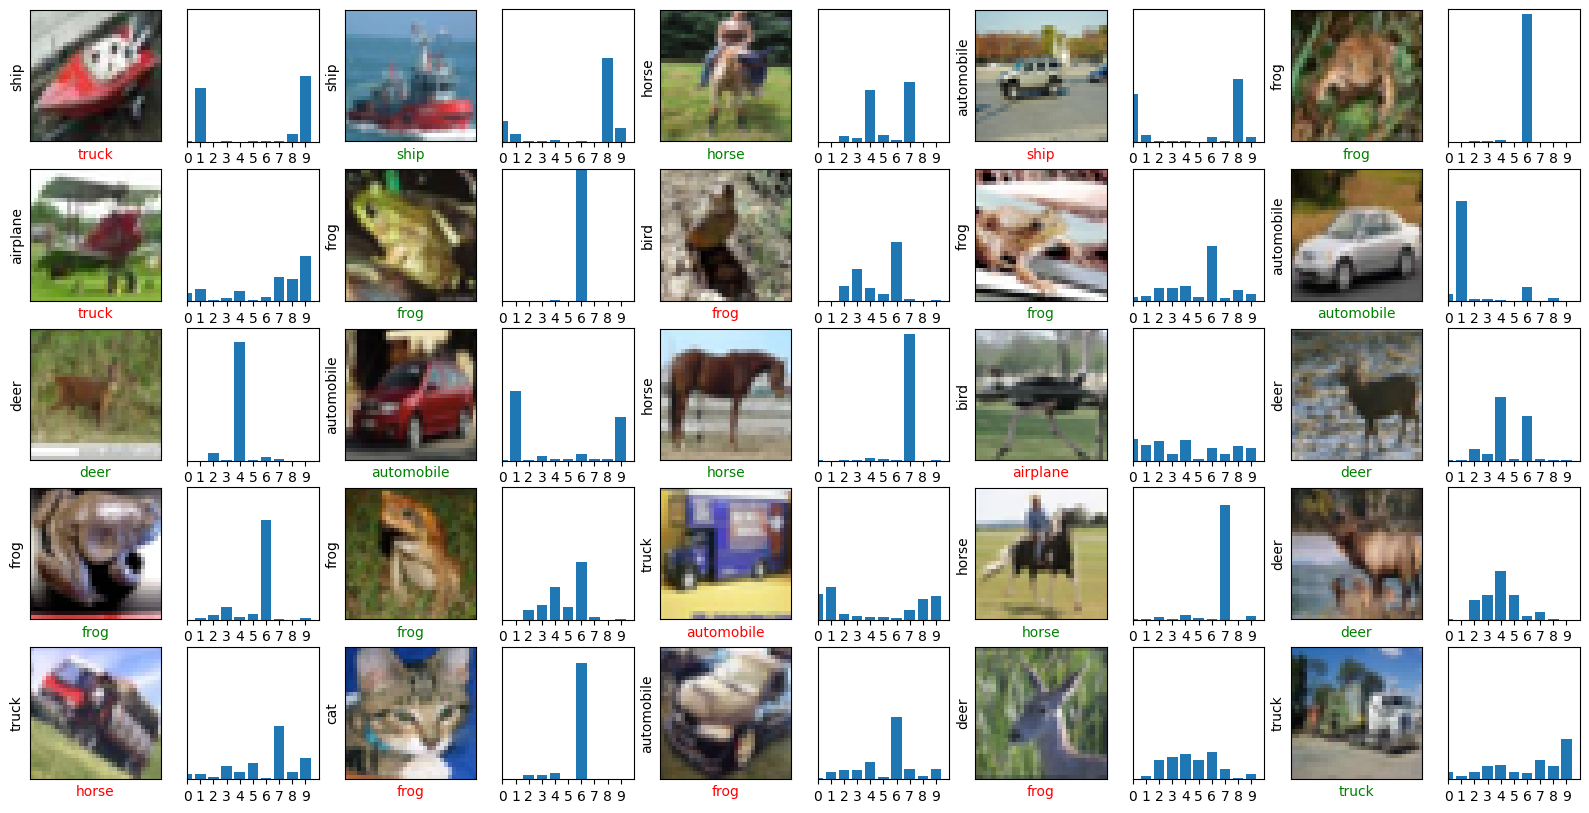

Model 2
313/313 [==============================] - 1s 3ms/step - loss: 1.4883 - accuracy: 0.6815


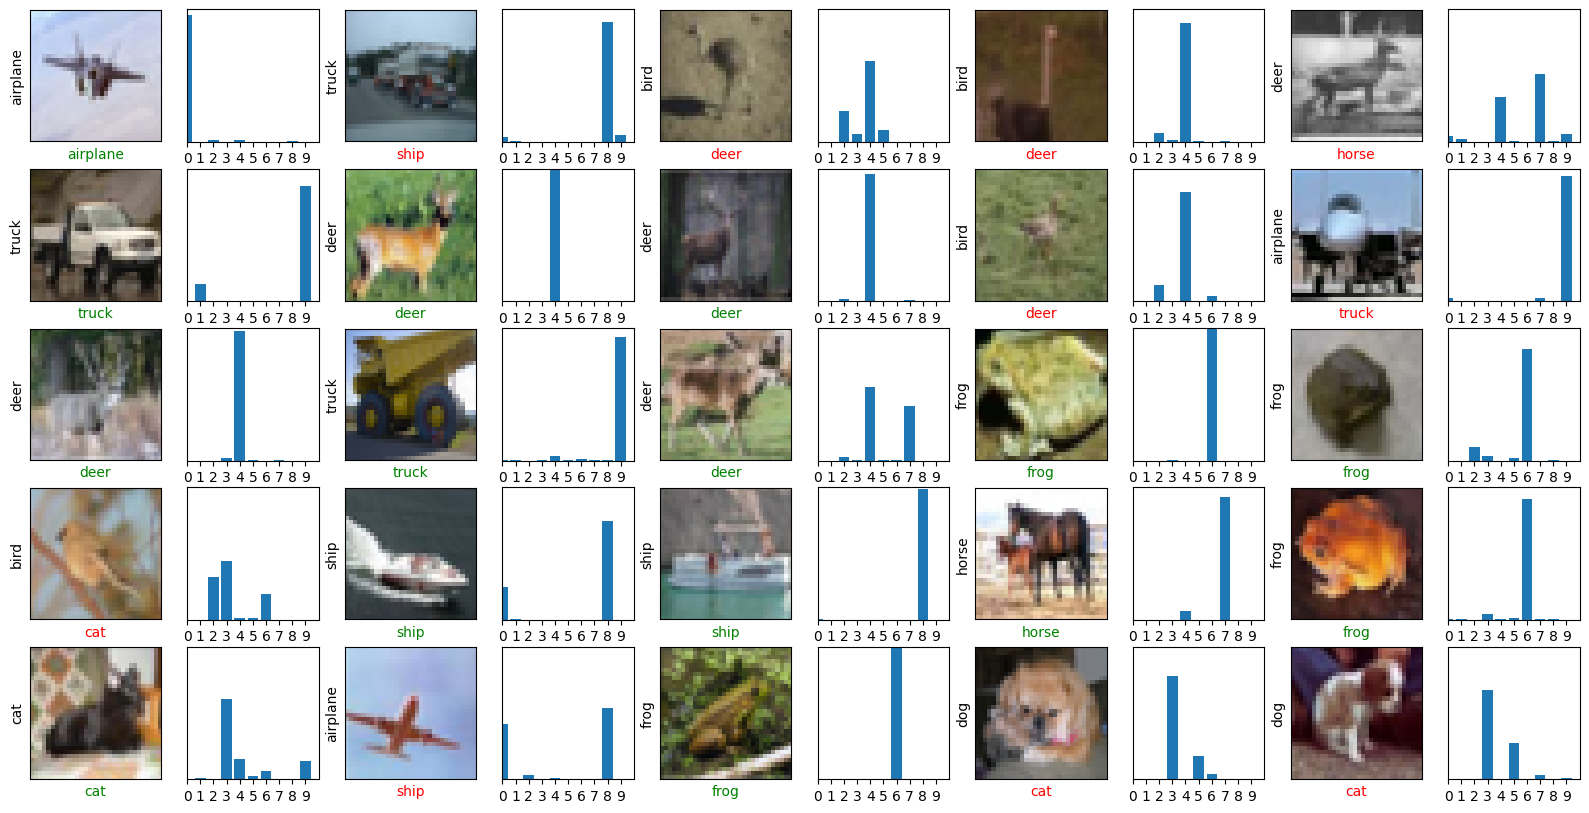

Model 3
313/313 [==============================] - 1s 3ms/step - loss: 1.0252 - accuracy: 0.7306


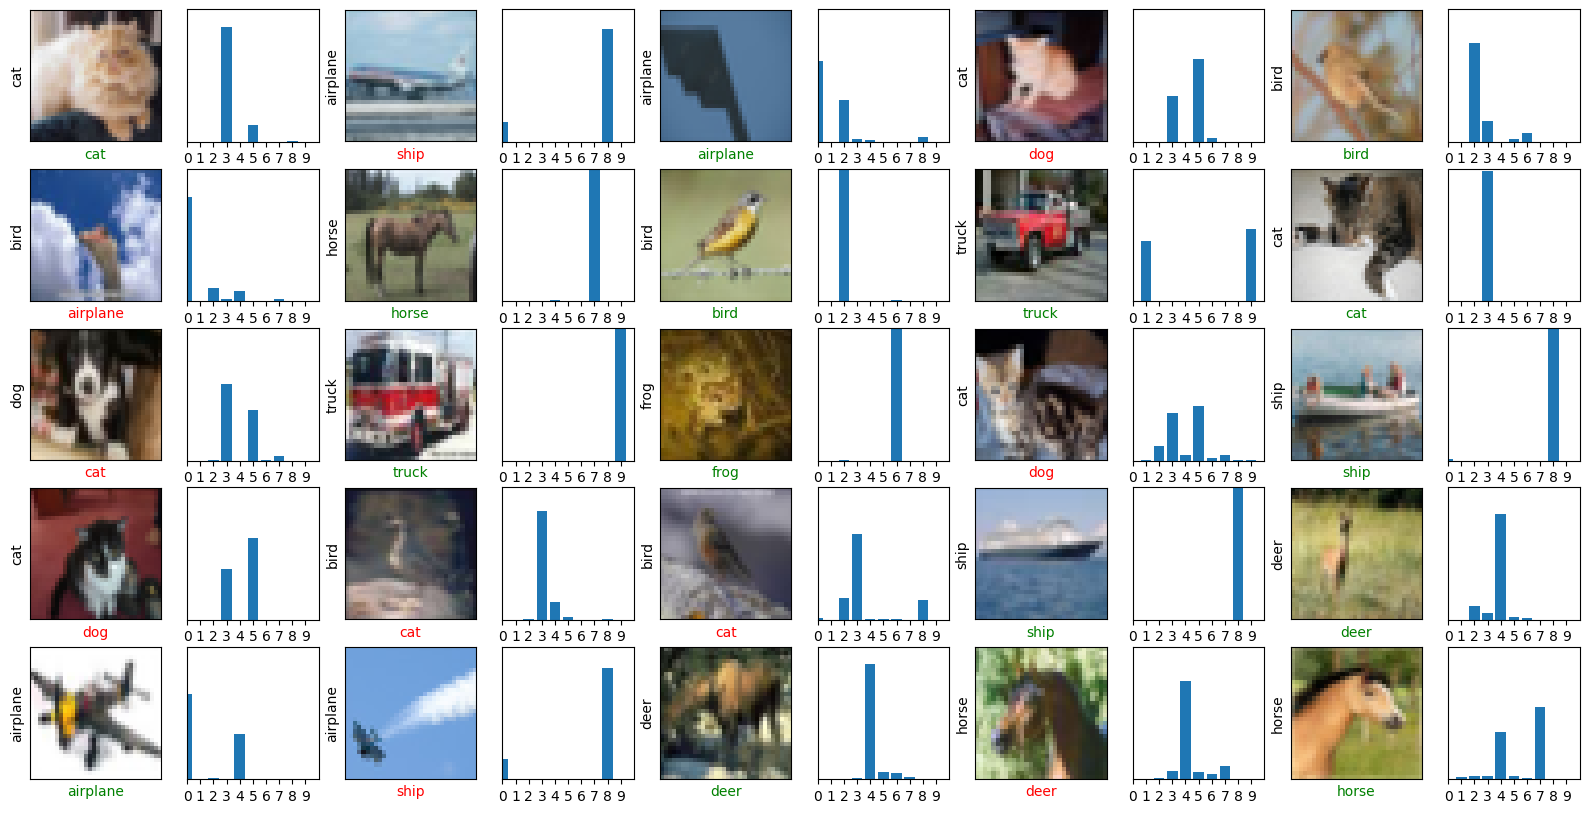

In [154]:
import random

models = [model1, model2, model3]

for i, model in enumerate(models, start=1):
    print(f"Model {i}")
    test_loss, test_acc = model.evaluate(test_img, test_label)
    predictions = model.predict(test_img)

    random_indices = random.sample(range(len(test_img)), 25)

    rows = 5
    cols = 5

    plt.figure(figsize=(20, 10))
    for j, index in enumerate(random_indices):
        plt.subplot(rows, 2 * cols, 2 * j + 1)
        plt.imshow(test_img[index])
        plt.xticks([])
        plt.yticks([])
        plt.ylabel(class_names[test_label[index][0]])
        if test_label[index][0] == np.argmax(predictions[index]):
            plt.xlabel(class_names[np.argmax(predictions[index])], color='g')
        else:
            plt.xlabel(class_names[np.argmax(predictions[index])], color='r')

        plt.subplot(rows, 2 * cols, 2 * j + 2)
        plt.bar(range(10), predictions[index])
        plt.yticks([])
        plt.xticks(range(0, 10))
        plt.ylim([0, 1])
        plt.xlim([0, 10])

    plt.show()

## DISCUSSION

#### Model Evaluation according to the Assignment requirements
<pre>Req-1: Highest Accuracy, lowest loss and no overfitting.
Req-2: Applying 3 different optimizers (SGD, RMSProp and ADAM) on the models.
Req-3: Demonstrate the effects of using Regularizers (L1/L2).
</pre>

Our model architecture was built focusing on maximum accuracy and minimum loss. Therefore, all three models were built keeping that in mind. To keep the models from overfitting was also considered a primary objective. Albeit, it needed rigorous training to get the objectives done, and it considered maximum accuracy after adjusting for minimum loss and overfitting. Therefore, the accuracy is not the best, but it is almost parallel to the validation and testing accuracy because of less loss and less chance of overfitting.<br><br>
We used only used L2 regularization in Model-2 and Model-3 to reduce overfitting and succeeded. Using both L1 and L2 was not giving the best accuracies and sometimes it was underfitting the model. So we only used L2 regularizer in our models.<br><br>
After all the training, testing, predicting and evaluating, Model-2 and Model-3 works much better than Model-1. The average accuracy of Model-2 is `69±2%` and Model-3 is `74±2%`. While Model-1 only has `50±2%` average accuracy. The verage loss of Model-1 is `1.308`, Model-2 is `1.435` and Model-3 is `1.012`. Overall, considering maximum accuracy, minimum loss and less overfitting, Model-3 gives the most suitable results.